In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Importing CSV file and Inspecting the data

In [2]:
#Importing the CSV file
house = pd.read_csv('C:/Users/divij/Downloads/train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Inspecting datatypes & non-null objects in each column
house.info()

# Shape of dataset
house.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

(1460, 81)

In [141]:
#Checking the numerical values
house.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,...,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.00000,1444.000000,1444.000000
mean,56.966759,69.628809,9776.617729,6.090720,5.574100,1971.234072,1984.788781,101.827562,3.393352,3.084488,...,0.003463,0.003463,0.083102,0.002078,0.867729,0.002770,0.008310,0.01385,0.819945,0.085180
std,42.306298,21.022758,4240.324624,1.376245,1.114098,30.240786,20.661892,178.555170,0.571060,0.352884,...,0.058762,0.058762,0.276133,0.045549,0.338903,0.052577,0.090812,0.11691,0.384367,0.279246
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1966.750000,0.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
50%,50.000000,69.000000,9423.000000,6.000000,5.000000,1973.000000,1993.500000,0.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,70.000000,79.000000,11475.750000,7.000000,6.000000,2000.000000,2004.000000,163.250000,4.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
max,190.000000,313.000000,36500.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Data Cleaning

In [4]:
# Let's check the values of some variables
print(house['LotFrontage'].value_counts())
print(house['Alley'].value_counts())
print(house['PoolQC'].value_counts())
print(house['Fence'].value_counts())
print(house['MiscFeature'].value_counts())
print(house['MiscVal'].value_counts())
print(house['MoSold'].value_counts())

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
        ... 
129.0      2
124.0      2
118.0      2
101.0      2
122.0      2
121.0      2
115.0      2
109.0      2
116.0      2
114.0      2
150.0      1
111.0      1
153.0      1
182.0      1
46.0       1
112.0      1
149.0      1
141.0      1
33.0       1
152.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence

In [5]:
# Dropping these columns as they are not needed
house.drop(['Alley',
        'PoolQC', 'Fence', 'MiscFeature',
        'MoSold', 'MiscVal','GarageYrBlt'], axis=1, inplace=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [6]:
#Dropping the null value row in the column 'Electrical'
house = house[pd.notnull(house['Electrical'])]
house.shape

(1459, 74)

In [7]:
#Inspecting the data again
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 74 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1200 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non

In [8]:
#Imputing various values in the columns which have NA values

house.loc[np.isnan(house['LotFrontage']), ['LotFrontage']] = house['LotFrontage'].median()
house['MasVnrType'].fillna("None", inplace = True)
house['MasVnrArea'].fillna(0, inplace = True)
house['BsmtQual'].fillna(0, inplace = True)
house['BsmtCond'].fillna(0, inplace = True)
house['BsmtExposure'].fillna(0, inplace = True)
house['BsmtFinType1'].fillna(0, inplace = True)
house['BsmtFinType2'].fillna(0, inplace = True)
house['GarageType'].fillna("No_garage", inplace = True)
house['GarageFinish'].fillna("No_garage", inplace = True)
house['FireplaceQu'].fillna(0, inplace = True)
house['GarageQual'].fillna(0, inplace = True)
house['GarageCond'].fillna(0, inplace = True)

house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 74 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non

In [9]:
#Changing ordered catagorical columns into numeric columns for ease of regression

house['ExterQual'] = house['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2,})
house['ExterCond'] = house['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
house['BsmtQual'] = house['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 0 : 0,})
house['BsmtCond'] = house['BsmtCond'].map({0 : 0, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,})
house['BsmtExposure'] = house['BsmtExposure'].map({'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0, 0: 0})
house['BsmtFinType1'] = house['BsmtFinType1'].map({'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': 0, 0: 0})
house['BsmtFinType2'] = house['BsmtFinType2'].map({'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': 0, 0: 0})
house['HeatingQC'] = house['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
house['KitchenQual'] = house['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2})
house['FireplaceQu'] = house['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0: 0})
house['GarageQual'] = house['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0: 0})
house['GarageCond'] = house['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,0: 0})

print(house['ExterQual'].value_counts())
print(house['ExterCond'].value_counts())
print(house['BsmtQual'].value_counts())
print(house['BsmtCond'].value_counts())
print(house['BsmtExposure'].value_counts())
print(house['BsmtFinType1'].value_counts())
print(house['BsmtFinType2'].value_counts())
print(house['HeatingQC'].value_counts())
print(house['KitchenQual'].value_counts())
print(house['FireplaceQu'].value_counts())
print(house['GarageQual'].value_counts())
print(house['GarageCond'].value_counts())

3    905
4    488
5     52
2     14
Name: ExterQual, dtype: int64
3    1281
4     146
2      28
5       3
1       1
Name: ExterCond, dtype: int64
3    649
4    617
5    121
0     37
2     35
Name: BsmtQual, dtype: int64
3    1310
4      65
2      45
0      37
1       2
Name: BsmtCond, dtype: int64
0    990
2    221
3    134
1    114
Name: BsmtExposure, dtype: int64
0    466
5    418
4    220
3    148
2    133
1     74
Name: BsmtFinType1, dtype: int64
0    1293
2      54
1      46
3      33
4      19
5      14
Name: BsmtFinType2, dtype: int64
5    741
3    428
4    240
2     49
1      1
Name: HeatingQC, dtype: int64
3    735
4    585
5    100
2     39
Name: KitchenQual, dtype: int64
0    689
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64
3    1310
0      81
2      48
4      14
5       3
1       3
Name: GarageQual, dtype: int64
3    1325
0      81
2      35
4       9
1       7
5       2
Name: GarageCond, dtype: int64


In [10]:
#Inspecting the data again
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 74 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non

**The data is clean now, we can proceed to EDA and Data preperation**

## Exploring the data

In [11]:
# Creating a dataframe for all numeric variables in the dataset for EDA
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,...,3,3,0,61,0,0,0,0,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,...,3,3,298,0,0,0,0,0,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,...,3,3,0,42,0,0,0,0,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,...,3,3,0,35,272,0,0,0,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,4,...,3,3,192,84,0,0,0,0,2008,250000


In [12]:
# Dropping ID 
house_numeric = house_numeric.drop(['Id'], axis=1)
house_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,...,3,3,0,61,0,0,0,0,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,3,3,...,3,3,298,0,0,0,0,0,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,4,3,...,3,3,0,42,0,0,0,0,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,3,3,...,3,3,0,35,272,0,0,0,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,4,3,...,3,3,192,84,0,0,0,0,2008,250000


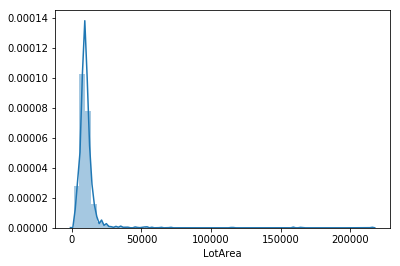

In [13]:
#Creating a plot for various numeric columns
sns.distplot(house_numeric['LotArea'])
plt.show()

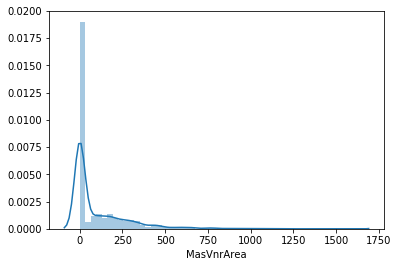

In [14]:
sns.distplot(house_numeric['MasVnrArea'])
plt.show()

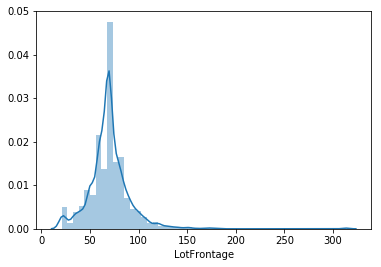

In [15]:
sns.distplot(house_numeric['LotFrontage'])
plt.show()

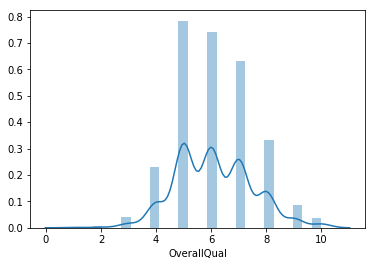

In [16]:
sns.distplot(house_numeric['OverallQual'])
plt.show()

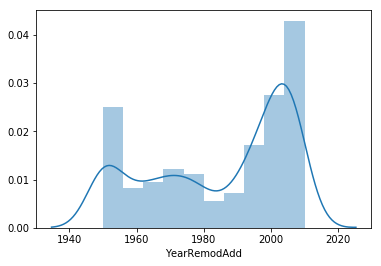

In [17]:
sns.distplot(house_numeric['YearRemodAdd'])
plt.show()

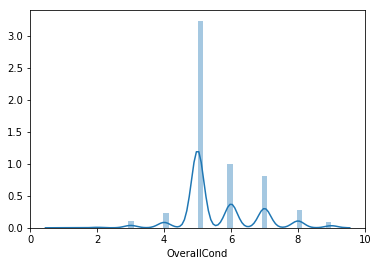

In [18]:
sns.distplot(house_numeric['OverallCond'])
plt.show()

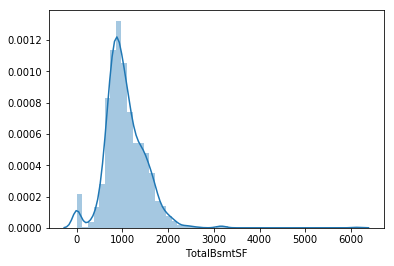

In [19]:
sns.distplot(house_numeric['TotalBsmtSF'])
plt.show()

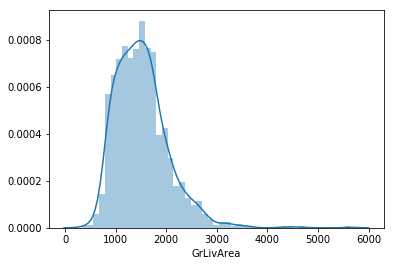

In [20]:
sns.distplot(house_numeric['GrLivArea'])
plt.show()

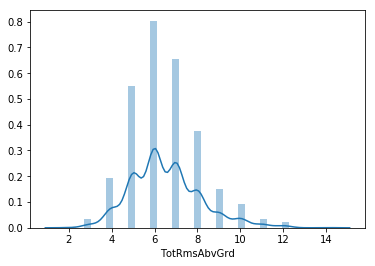

In [21]:
sns.distplot(house_numeric['TotRmsAbvGrd'])
plt.show()

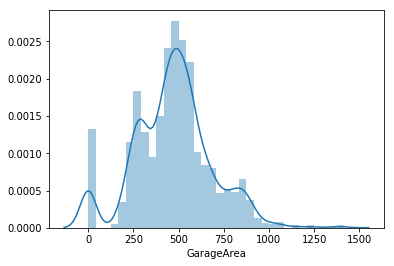

In [22]:
sns.distplot(house_numeric['GarageArea'])
plt.show()

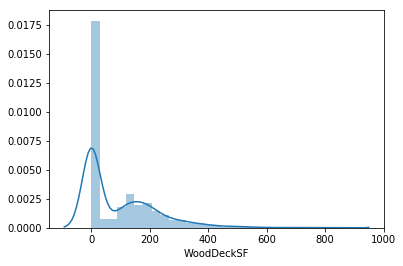

In [23]:
sns.distplot(house_numeric['WoodDeckSF'])
plt.show()

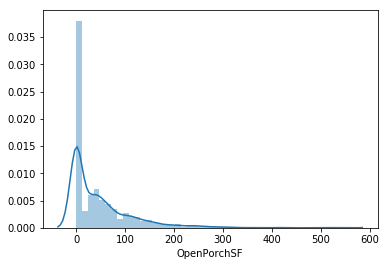

In [24]:
sns.distplot(house_numeric['OpenPorchSF'])
plt.show()

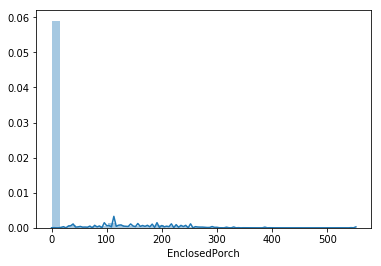

In [25]:
sns.distplot(house_numeric['EnclosedPorch'])
plt.show()

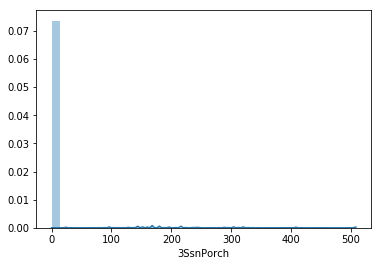

In [26]:
sns.distplot(house_numeric['3SsnPorch'])
plt.show()

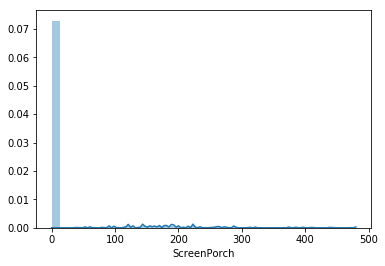

In [27]:
sns.distplot(house_numeric['ScreenPorch'])
plt.show()

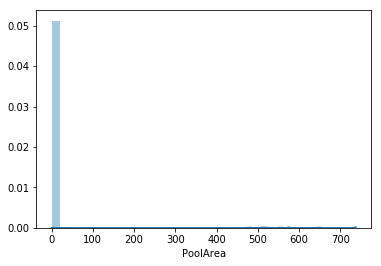

In [28]:
sns.distplot(house_numeric['PoolArea'])
plt.show()

In [29]:
# Dropping these columns as they are not needed and are mostly 0
house.drop(['EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea'], axis=1, inplace=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 70 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non

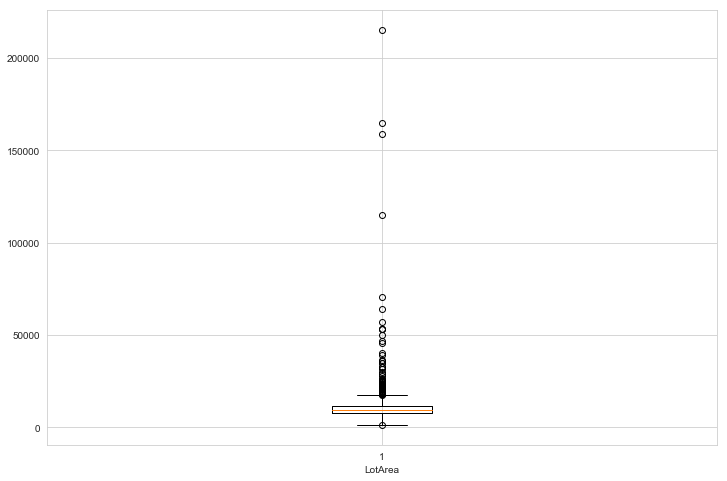

In [30]:
#Checking for outliers in the column 'LotArea'

sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
plt.boxplot(house['LotArea'])
plt.xlabel('LotArea')
plt.show()

In [31]:
# Removing outliers from 'LotArea'
Q1 = house['LotArea'].quantile(0.05)
Q3 = house['LotArea'].quantile(0.95)
IQR = Q3 - Q1
house = house[(house['LotArea'] >= Q1 - 1.5*IQR) & (house['LotArea'] <= Q3 + 1.5*IQR)]

In [32]:
#Checking the shape of the dataset after removal of outliers
house.shape

(1444, 70)

In [33]:
# Correlation matrix
cor = house_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SalePrice
MSSubClass,1.000000,-0.356810,-0.139766,0.032936,-0.059134,0.027435,0.040199,0.023792,0.016440,-0.064604,...,-0.073053,-0.089957,-0.012598,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.021461,-0.084230
LotFrontage,-0.356810,1.000000,0.304533,0.234942,-0.053235,0.116627,0.083277,0.178545,0.165663,-0.016407,...,0.107207,0.102529,0.075538,0.137107,0.010323,0.061957,0.037683,0.180827,0.006367,0.334793
LotArea,-0.139766,0.304533,1.000000,0.105786,-0.005665,0.014296,0.013852,0.103302,0.055542,0.014720,...,0.079329,0.076113,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,-0.014254,0.263837
OverallQual,0.032936,0.234942,0.105786,1.000000,-0.092243,0.573334,0.551605,0.407075,0.726178,0.013826,...,0.292613,0.287169,0.239000,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.027277,0.791069
OverallCond,-0.059134,-0.053235,-0.005665,-0.092243,1.000000,-0.375780,0.074158,-0.125922,-0.139222,0.389122,...,0.019155,0.016802,-0.003318,-0.032847,0.070238,0.025465,0.054721,-0.002009,0.044003,-0.077924
YearBuilt,0.027435,0.116627,0.014296,0.573334,-0.375780,1.000000,0.592512,0.312227,0.599074,-0.103786,...,0.286984,0.291025,0.224946,0.189359,-0.387177,0.031461,-0.050175,0.005006,-0.013733,0.523273
YearRemodAdd,0.040199,0.083277,0.013852,0.551605,0.074158,0.592512,1.000000,0.177038,0.588153,0.074951,...,0.148794,0.143953,0.205773,0.226944,-0.193740,0.045389,-0.038558,0.005882,0.035656,0.507430
MasVnrArea,0.023792,0.178545,0.103302,0.407075,-0.125922,0.312227,0.177038,1.000000,0.345154,-0.018161,...,0.135068,0.133871,0.160026,0.122287,-0.110065,0.019100,0.062151,0.011903,-0.008263,0.472606
ExterQual,0.016440,0.165663,0.055542,0.726178,-0.139222,0.599074,0.588153,0.345154,1.000000,0.009073,...,0.219188,0.214846,0.207988,0.291317,-0.149790,0.036885,0.012563,0.034739,-0.006680,0.682677
ExterCond,-0.064604,-0.016407,0.014720,0.013826,0.389122,-0.103786,0.074951,-0.018161,0.009073,1.000000,...,0.094971,0.103988,0.046882,0.063177,0.035038,0.005178,0.028550,0.044377,0.008076,0.018872


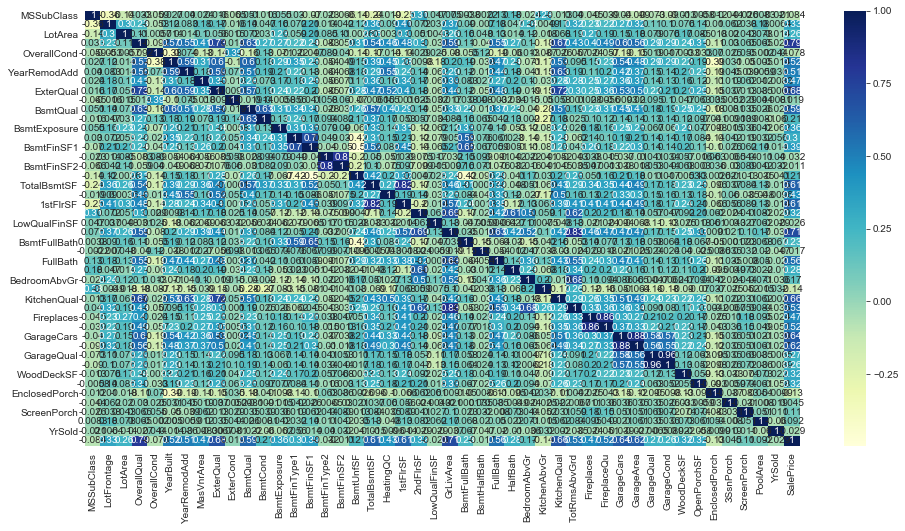

In [34]:
#Creating a correlation heatmap
plt.figure(figsize=(16,8))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## Data Preperation

In [35]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,548,3,3,Y,0,61,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,460,3,3,Y,298,0,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,608,3,3,Y,0,42,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,642,3,3,Y,0,35,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,836,3,3,Y,192,84,2008,WD,Normal,250000


In [36]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [37]:
# Mapping variable 'CentralAir'
var =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1,"N": 0})

# Applying the function to the house df
house[var] = house[var].apply(binary_map)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,548,3,3,Y,0,61,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,460,3,3,Y,298,0,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,608,3,3,Y,0,42,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,642,3,3,Y,0,35,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,836,3,3,Y,192,84,2008,WD,Normal,250000


In [40]:
# Subsetting all categorical variables
house_categorical = house.select_dtypes(include=['object'])
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,None,CBlock,GasA,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,None,BrkTil,GasA,SBrkr,Typ,Detchd,Unf,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,RFn,Y,WD,Normal


In [41]:
house_categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [42]:
# Converting into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [43]:
# dropping orignal categorical columns from the split dataset
house = house.drop(list(house_categorical.columns), axis=1)

In [44]:
# Concatenating dummy variables with X
house = pd.concat([house, house_dummies], axis=1)

In [45]:
# Checking the first few rows to see if dummy variables are in the main df
house.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,4,...,0,0,0,0,1,0,0,0,1,0


In [46]:
# Dropping the 'Id' column
house.drop('Id', axis = 1, inplace = True)
house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,3,3,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,4,3,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,3,3,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,4,3,...,0,0,0,0,1,0,0,0,1,0


## Splitting data into train and test

In [47]:
# Splitting the datafram into train and test sets
from sklearn.cross_validation import train_test_split
df_train, df_test = train_test_split(house, train_size=0.7, test_size=0.3, random_state=100)

In [48]:
house_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'YrSold', 'SalePrice'],
      dtype='object')

In [50]:
#Scaling the numerical columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

varlist = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF',
       'YrSold', 'SalePrice']

df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [51]:
# Checking to see if all columns are scaled
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
161,0.064037,2.048973,1.003115,2.116846,-0.526555,1.067101,0.934479,3.223882,1.095900,-0.246357,...,0,0,0,0,1,0,0,0,1,0
460,0.064037,0.311389,-0.406963,1.396248,-0.526555,1.267903,1.173713,0.054568,1.095900,-0.246357,...,0,0,1,0,0,0,0,0,0,1
554,0.064037,0.807841,0.243250,0.675650,-0.526555,1.067101,0.934479,1.095751,1.095900,-0.246357,...,0,0,0,0,1,0,0,0,1,0
107,-0.873320,-0.929743,-0.904113,-0.765546,-0.526555,-0.773585,-1.649243,-0.574718,-0.683616,-0.246357,...,0,0,0,0,1,0,0,0,0,1
1306,1.470074,-1.029033,-0.667198,0.675650,-0.526555,1.134035,1.030173,-0.036964,1.095900,-0.246357,...,0,0,1,0,0,0,0,0,0,1


In [53]:
# Splitting the train dataset into X and y

y_train = df_train.pop('SalePrice')
X_train = df_train

## Selecting 50 columns to start with by using RFE

In [57]:
# Performing RFE to select 50 columns
from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe1 = RFE(lm, 50)

rfe1.fit(X_train, y_train)


print(rfe1.support_)           
print(rfe1.ranking_)

[False False False  True  True  True False False False False False False
 False False  True False False  True  True False False  True  True False
  True False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False  True  True False False False False False False False False False
  True  True  True  True False False False False False  True False False
 False False False False  True False False  True  True  True False False
 False  True  True False  True  True  True False False False False False
 False False False False False  True False  True False False False False
 False False False  True False False  True False  True  True False  True
 False False False False False  True  True False  True False False False
  True False False False False False False False False False  True False
  True False False False  True  True False False Fa

In [58]:
# Subsetting the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 50 selected columns
X_train_rfe1 = X_train[col1]
X_train_rfe1.head()

,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,...,Heating_OthW,Heating_Wall,Functional_Maj2,GarageType_No_garage,GarageFinish_No_garage,GarageFinish_RFn,SaleType_Con,SaleType_ConLD,SaleType_New,SaleCondition_Alloca
161,2.116846,-0.526555,1.067101,1.350658,-0.031707,1.263589,1.128293,1.771430,2.318731,0.193744,...,0,0,0,0,0,0,0,0,0,0
460,1.396248,-0.526555,1.267903,0.265738,-0.640867,-0.494922,-0.851429,1.787809,0.869562,0.193744,...,0,0,0,0,0,0,0,0,1,0
554,0.675650,-0.526555,1.067101,1.005874,-0.995453,-0.100445,-0.385927,1.640395,1.089013,0.193744,...,0,0,0,0,0,1,0,0,0,0
107,-0.765546,-0.526555,-0.773585,-0.745627,-0.122626,-0.597105,-0.966467,-0.793101,-1.396124,-1.060625,...,0,0,0,0,0,0,0,0,0,0
1306,0.675650,-0.526555,1.134035,-0.984677,1.813958,0.778810,0.582532,-0.793101,-0.251419,-1.060625,...,0,0,0,0,0,1,0,0,1,0


## Ridge and Lasso Regularisation

In [101]:
# list of alphas to tune using ridge regularisation

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train_rfe1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [102]:
# Printing the results of ridge regularisation in a dataframe
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge = cv_results_ridge[cv_results_ridge['param_alpha']<=200]
cv_results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002002,0.000015,0.000199,0.000399,0.0001,{'alpha': 0.0001},-0.222105,-0.277547,-0.242263,-0.245645,...,-0.245640,0.017935,24,-0.235311,-0.221182,-0.227476,-0.223245,-0.227813,-0.227005,0.004856
1,0.002194,0.000399,0.000000,0.000000,0.001,{'alpha': 0.001},-0.222094,-0.277526,-0.242243,-0.245640,...,-0.245627,0.017932,23,-0.235313,-0.221183,-0.227477,-0.223246,-0.227816,-0.227007,0.004856
2,0.001993,0.000002,0.000199,0.000399,0.01,{'alpha': 0.01},-0.221994,-0.277321,-0.242050,-0.245593,...,-0.245507,0.017895,22,-0.235333,-0.221201,-0.227494,-0.223259,-0.227843,-0.227026,0.004858
3,0.002391,0.000485,0.000000,0.000000,0.05,{'alpha': 0.05},-0.221579,-0.276486,-0.241289,-0.245402,...,-0.245016,0.017752,21,-0.235413,-0.221272,-0.227557,-0.223311,-0.227943,-0.227099,0.004865
4,0.001995,0.001262,0.000399,0.000488,0.1,{'alpha': 0.1},-0.221120,-0.275588,-0.240507,-0.245236,...,-0.244489,0.017606,20,-0.235506,-0.221366,-0.227617,-0.223372,-0.228038,-0.227180,0.004869


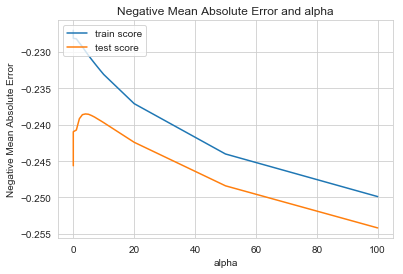

In [103]:
# plotting mean test and train scoes with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [69]:
#Selecting optimal alpha value and getting coefficients
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe1, y_train)
ridge.coef_

array([ 0.2354667 ,  0.10626977,  0.18067663,  0.12504008, -0.03973652,
        0.15117077,  0.163875  ,  0.16840582,  0.28109825, -0.10493029,
       -0.13816882,  0.00054376,  0.10807716,  0.10746602, -0.1577685 ,
        0.39784779,  0.4401851 ,  0.29871372, -0.22345799,  0.03779544,
       -0.01999603,  0.10881749, -0.00220936,  0.05962966, -0.22103149,
       -0.38486223, -0.28103821,  0.12006037,  0.07574598, -0.03397732,
       -0.12741344, -0.05454902, -0.16055146,  0.03072317, -0.03397732,
        0.07840822,  0.18378781,  0.16151736,  0.19029814, -0.22913558,
       -0.12275198,  0.14062418, -0.06604525, -0.01568396, -0.01568396,
       -0.08565297,  0.12447118,  0.0720448 ,  0.33659927,  0.15329724])

**Optimal ridge alpha value is '4'**

In [71]:
#Scaling the numerical values of test data for preditions
df_test[varlist] = scaler.transform(df_test[varlist])

In [73]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('SalePrice')
X_test = df_test

In [74]:
# Getting the selected 50 columns in the test data
X_test_rfe1 = X_test[col1]

In [75]:
#Predicting using ridge
pred = ridge.predict(X_test_rfe1)

In [76]:
#mean squared error
mse = np.mean((pred - y_test)**2)
mse

0.13019472558990244

In [77]:
#Getting the ridge score
ridge.score(X_test_rfe1,y_test)

0.8692364891375549

In [110]:
# list of alphas to tune using lasso regularisation

lasso = Lasso()

params = {'alpha': [0.0001, 0.0002, 0.00041, 0.0005, 0.001, 
 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.0080]}

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train_rfe1, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.0002, 0.00041, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.008]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [111]:
# Printing the results of lasso regularisation in a dataframe
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014362,0.003710,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.221181,-0.274697,-0.239189,-0.244800,...,-0.243948,0.017342,8,-0.235263,-0.221383,-0.227750,-0.223455,-0.228173,-0.227205,0.004778
1,0.010173,0.001466,0.000798,0.000399,0.0002,{'alpha': 0.0002},-0.220191,-0.272336,-0.238499,-0.244251,...,-0.242788,0.016860,6,-0.235704,-0.221861,-0.227953,-0.224038,-0.228557,-0.227623,0.004740
2,0.009774,0.001163,0.000798,0.000399,0.00041,{'alpha': 0.00041},-0.218662,-0.269735,-0.237513,-0.243581,...,-0.241084,0.016548,4,-0.236545,-0.222549,-0.228191,-0.225022,-0.229900,-0.228441,0.004781
3,0.011769,0.002035,0.000797,0.000399,0.0005,{'alpha': 0.0005},-0.218575,-0.268755,-0.237315,-0.243549,...,-0.240677,0.016288,2,-0.236978,-0.222840,-0.228449,-0.225414,-0.230676,-0.228872,0.004847
4,0.008577,0.001955,0.000000,0.000000,0.001,{'alpha': 0.001},-0.217454,-0.266834,-0.236911,-0.245047,...,-0.240053,0.016120,1,-0.239227,-0.225069,-0.230766,-0.227095,-0.233869,-0.231205,0.005024


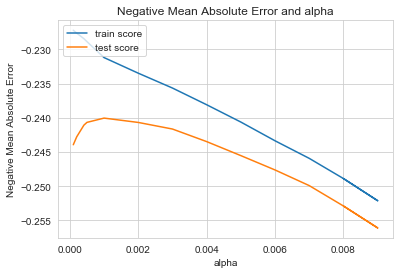

In [112]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [113]:
#Selecting optimal alpha value and getting coefficients
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe1, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

**Optimal lasso alpha value is '0.001'**

In [114]:
lasso.coef_

array([ 2.35536411e-01,  1.05480727e-01,  1.81617475e-01,  1.34227340e-01,
       -2.92635499e-02,  1.36653996e-01,  1.19630034e-01,  1.18465028e-01,
        3.35802505e-01, -1.03884747e-01, -9.48708801e-03,  0.00000000e+00,
        7.90039990e-02,  1.32297428e-02, -1.49561242e-01,  4.46662849e-01,
        4.68180063e-01,  3.22577795e-01, -2.09939344e-01,  0.00000000e+00,
       -0.00000000e+00,  4.37651311e-02, -0.00000000e+00,  0.00000000e+00,
       -1.96871346e-01, -3.96442579e-01, -2.77623528e-01,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -3.27725860e-02,
       -0.00000000e+00,  2.13833433e-02, -0.00000000e+00,  5.34163140e-02,
        9.58214154e-02,  3.03504726e-03,  1.93156864e-01, -1.93500560e-01,
       -0.00000000e+00,  3.37616329e-02, -0.00000000e+00, -1.54551487e-02,
       -7.07446781e-17, -8.10313139e-02,  0.00000000e+00,  0.00000000e+00,
        3.44023206e-01,  7.14096357e-02])

In [115]:
#Predicting using lasso
pred = lasso.predict(X_test_rfe1)

In [116]:
# mean squared error
mse = np.mean((pred - y_test)**2)
mse

0.12999502824249173

In [117]:
#Getting the lasso score
lasso.score(X_test_rfe1,y_test)

0.8694370589082505

## Building the model

In [118]:
#Building final model using 15 coeffecients
from sklearn.feature_selection import RFE

rfe1 = RFE(lasso, 15)

rfe1.fit(X_train_rfe1, y_train)

print(rfe1.support_)           
print(rfe1.ranking_)

[ True False  True  True False False  True False  True False False False
 False False  True  True  True  True  True False False False False False
  True  True  True False False False False False False False False False
 False False False  True False False False False False False False False
  True False]
[ 1  6  1  1 15  5  1  2  1  3 19 35  9 18  1  1  1  1  1 36 32 12 33 34
  1  1  1 31 22 29 30 13 27 16 28 11  8 20  4  1 23 14 24 17 21  7 26 25
  1 10]


In [119]:
import statsmodels.api as sm  

# Subsetting the features selected by rfe1
col2 = X_train_rfe1.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe2 = X_train_rfe1[col2]

# Adding a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,OverallQual,YearBuilt,BsmtFinSF1,1stFlrSF,GrLivArea,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Condition1_RRAe,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Foundation_Wood,SaleType_New
161,1.0,2.116846,1.067101,1.350658,1.128293,2.318731,0,0,1,0,0,0,0,0,0,0
460,1.0,1.396248,1.267903,0.265738,-0.851429,0.869562,0,0,0,0,0,0,0,0,0,1
554,1.0,0.675650,1.067101,1.005874,-0.385927,1.089013,0,0,1,0,0,0,0,0,0,0
107,1.0,-0.765546,-0.773585,-0.745627,-0.966467,-1.396124,0,0,0,0,0,0,0,0,0,0
1306,1.0,0.675650,1.134035,-0.984677,0.582532,-0.251419,0,0,1,0,0,0,0,1,0,1


In [120]:
X_train_rfe2.shape

(1010, 16)

In [121]:
X_train_rfe2 = X_train_rfe2.reset_index()

In [122]:
X_train_rfe2.columns

Index(['index', 'const', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', '1stFlrSF',
       'GrLivArea', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_RRAe',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Foundation_Wood', 'SaleType_New'],
      dtype='object')

In [123]:
X_train_rfe2 = X_train_rfe2.drop(['index'], axis=1)
X_train_rfe2.columns

Index(['const', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', '1stFlrSF',
       'GrLivArea', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_RRAe',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Foundation_Wood', 'SaleType_New'],
      dtype='object')

In [124]:
y_train.shape

(1010,)

In [125]:
y_train = pd.DataFrame(y_train)
y_train.shape

(1010, 1)

In [126]:
y_train.head()

,SalePrice
161,2.977329
460,1.079060
554,1.340945
107,-0.811186
1306,0.303083


In [127]:
y_train = y_train.reset_index() 

In [128]:
y_train = y_train.drop(['index'], axis=1)
y_train.head()

,SalePrice
0,2.977329
1,1.079060
2,1.340945
3,-0.811186
4,0.303083


In [129]:
# Fitting the model with 15 variables
lasso1 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lasso1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     439.5
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:56:04   Log-Likelihood:                -406.73
No. Observations:                1010   AIC:                             845.5
Df Residuals:                     994   BIC:                             924.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0218 

In [130]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
colm = X_train_rfe2
vif['Features'] = colm.columns
vif['VIF'] = [variance_inflation_factor(colm.values, i) for i in range(colm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,OverallQual,2.81
5,GrLivArea,2.17
4,1stFlrSF,1.93
2,YearBuilt,1.90
0,const,1.60
15,SaleType_New,1.35
8,Neighborhood_NridgHt,1.34
3,BsmtFinSF1,1.33
7,Neighborhood_NoRidge,1.24
13,BldgType_TwnhsE,1.18


## Making Predictions

In [133]:
X_test_rfe1.head()

,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,...,Heating_OthW,Heating_Wall,Functional_Maj2,GarageType_No_garage,GarageFinish_No_garage,GarageFinish_RFn,SaleType_Con,SaleType_ConLD,SaleType_New,SaleCondition_Alloca
1255,-0.044948,0.359813,-1.342524,-0.007790,-0.252187,-0.371351,-0.511666,0.161578,-0.253396,0.193744,...,0,0,0,0,0,0,0,0,0,0
30,-1.486144,-1.412922,-1.710661,-0.984677,0.179681,-0.929797,-1.341009,0.769952,-0.352248,0.193744,...,0,0,0,0,0,0,0,0,0,0
899,-0.765546,1.246180,-0.338514,0.084152,-0.279463,-0.304812,0.229392,-0.793101,-0.512388,0.193744,...,0,0,0,0,0,0,0,0,0,0
1203,0.675650,-0.526555,0.966700,-0.984677,2.409480,1.401418,1.283461,-0.793101,0.266565,0.193744,...,0,0,0,0,0,0,0,0,0,0
278,2.116846,-0.526555,1.167502,-0.984677,3.525517,2.568214,2.597033,-0.793101,1.237291,0.193744,...,0,0,0,0,0,0,0,0,1,0


In [135]:
X_test_rfe2 = X_test[col2]
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 1255 to 526
Data columns (total 15 columns):
OverallQual             434 non-null float64
YearBuilt               434 non-null float64
BsmtFinSF1              434 non-null float64
1stFlrSF                434 non-null float64
GrLivArea               434 non-null float64
Neighborhood_NWAmes     434 non-null uint8
Neighborhood_NoRidge    434 non-null uint8
Neighborhood_NridgHt    434 non-null uint8
Neighborhood_StoneBr    434 non-null uint8
Condition1_RRAe         434 non-null uint8
BldgType_Duplex         434 non-null uint8
BldgType_Twnhs          434 non-null uint8
BldgType_TwnhsE         434 non-null uint8
Foundation_Wood         434 non-null uint8
SaleType_New            434 non-null uint8
dtypes: float64(5), uint8(10)
memory usage: 24.6 KB


In [136]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 1255 to 526
Data columns (total 16 columns):
const                   434 non-null float64
OverallQual             434 non-null float64
YearBuilt               434 non-null float64
BsmtFinSF1              434 non-null float64
1stFlrSF                434 non-null float64
GrLivArea               434 non-null float64
Neighborhood_NWAmes     434 non-null uint8
Neighborhood_NoRidge    434 non-null uint8
Neighborhood_NridgHt    434 non-null uint8
Neighborhood_StoneBr    434 non-null uint8
Condition1_RRAe         434 non-null uint8
BldgType_Duplex         434 non-null uint8
BldgType_Twnhs          434 non-null uint8
BldgType_TwnhsE         434 non-null uint8
Foundation_Wood         434 non-null uint8
SaleType_New            434 non-null uint8
dtypes: float64(6), uint8(10)
memory usage: 28.0 KB


In [137]:
# Making predictions
y_pred = lasso1.predict(X_test_rfe2)

Text(0,0.5,'y_pred')

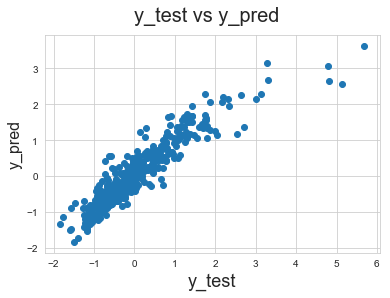

In [138]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [139]:
# r2_score for 15 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8493670675937941

# The top 5 variables in determining the price of the house after examining their coefficients and business value are

### 1. Neighborhood_NoRidge: 0.5565

### 2. Foundation_Wood: -0.5219

### 3.BldgType_TwnhsI: -0.3752

### 4. SaleType_New : 0.3695

### 5. GrLivArea: 0.3697